In [1]:
from opinion_dynamics.model import OpinionNetwork
from mesa.batchrunner import BatchRunner

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

**Using classic majority rule**

In [10]:
N = 100
model = OpinionNetwork(N, 3, zero_prob = 0.5)

for i in range(100):
    model.step()

In [11]:
opinions = model.datacollector.get_model_vars_dataframe()
opinions

,opinion_0,opinion_1
0,44,56
1,26,74
2,23,77
3,21,79
4,21,79
5,21,79
6,21,79
7,21,79
8,21,79
9,21,79


Text(0, 0.5, 'Opinion 0 Count')

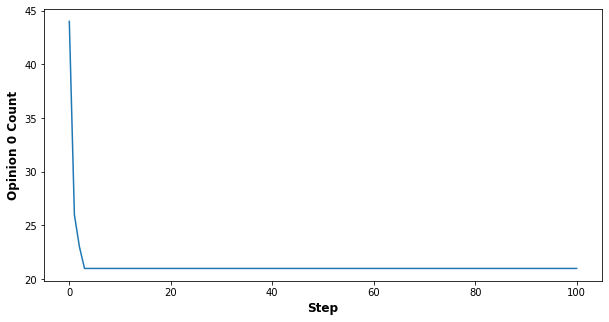

In [12]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = opinions.index, y = opinions['opinion_0'])
plt.xlabel('Step', **{'fontweight' : 'bold', 'fontsize' : 'large'})
plt.ylabel('Opinion 0 Count', **{'fontweight' : 'bold', 'fontsize' : 'large'})

In [13]:
nx.readwrite.write_gml(model.G, 'terminal_graph.gml', stringizer = str)

**Using influence majority rule**

In [2]:
model = OpinionNetwork(1000, 3, rule = 'IMR')

for i in range(100):
    model.step()

In [3]:
opinions = model.datacollector.get_model_vars_dataframe()

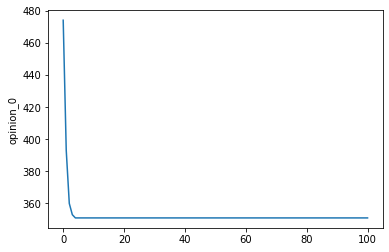

In [4]:
sns.lineplot(x = opinions.index, y = opinions['opinion_0'])

**Doing a batch run to pull out more stable results**

In [38]:
#We start opinion 0 significantly in the minority - initial prob of 0.4
fixed_params = {'N' : 1000, 'avg_node_degree' : 5, 'rule' : 'CMR', 'zero_prob' : 0.4}

In [39]:
batch_run = BatchRunner(
    OpinionNetwork,
    fixed_parameters = fixed_params,
    iterations = 50,
    max_steps = 60, #should be enough to reach a steady state 
    model_reporters = {'opinion_series' : lambda m: [m.datacollector.get_model_vars_dataframe()['opinion_0'].to_numpy(),
                                                     m.datacollector.get_model_vars_dataframe()['opinion_1'].to_numpy()]}
)

In [40]:
batch_run.run_all()

50it [01:23,  1.68s/it]


In [41]:
batch_data = batch_run.get_model_vars_dataframe()
batch_data.head()

,Run,opinion_series,N,avg_node_degree,rule,zero_prob
0,1000,"[[415, 269, 134, 47, 5, 2, 2, 2, 2, 2, 2, 2, 2...",1000,5,CMR,0.4
27,1000,"[[414, 366, 309, 264, 217, 164, 112, 77, 50, 2...",1000,5,CMR,0.4
28,1000,"[[404, 213, 72, 14, 4, 3, 2, 2, 2, 2, 2, 2, 2,...",1000,5,CMR,0.4
29,1000,"[[374, 177, 55, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1000,5,CMR,0.4
30,1000,"[[412, 287, 139, 66, 27, 16, 8, 6, 5, 5, 5, 5,...",1000,5,CMR,0.4


In [42]:
#Extracting the time series for the initial minority opinion
batch_data['minority_series'] = batch_data['opinion_series'].apply(lambda a: a[0] if a[0][0] < a[1][0] else a[1])
batch_data['minority_series']

0     [415, 269, 134, 47, 5, 2, 2, 2, 2, 2, 2, 2, 2,...
27    [414, 366, 309, 264, 217, 164, 112, 77, 50, 29...
28    [404, 213, 72, 14, 4, 3, 2, 2, 2, 2, 2, 2, 2, ...
29    [374, 177, 55, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
30    [412, 287, 139, 66, 27, 16, 8, 6, 5, 5, 5, 5, ...
31    [407, 196, 63, 18, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...
32    [405, 258, 119, 24, 4, 3, 3, 3, 3, 3, 3, 3, 3,...
33    [391, 298, 204, 120, 52, 13, 3, 1, 1, 1, 1, 1,...
34    [422, 358, 262, 160, 63, 21, 9, 7, 7, 7, 7, 7,...
35    [370, 205, 84, 21, 8, 5, 5, 5, 5, 5, 5, 5, 5, ...
36    [406, 308, 181, 89, 24, 11, 6, 5, 5, 5, 5, 5, ...
37    [389, 225, 90, 34, 21, 19, 18, 14, 11, 7, 5, 5...
38    [409, 266, 150, 90, 47, 29, 24, 24, 24, 24, 24...
39    [399, 187, 67, 20, 9, 6, 6, 6, 6, 6, 6, 6, 6, ...
40    [399, 311, 203, 101, 37, 10, 7, 7, 7, 7, 7, 7,...
41    [402, 251, 114, 55, 30, 16, 9, 8, 8, 8, 8, 8, ...
42    [421, 422, 369, 336, 315, 282, 228, 168, 96, 3...
43    [396, 268, 137, 61, 27, 17, 12, 8, 8, 8, 8

In [43]:
#Extracting the series mean
np.mean(batch_data['minority_series'].to_numpy(), axis = 0)

array([401, 252, 131,  65,  34,  20,  14,  11,   9,   7,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6])

In [53]:
#Stretching out all of the vectors and putting into one data frame
final_data = pd.DataFrame(columns = ['opinion_0_ct'])

for arr in batch_data['minority_series']:
    final_data = final_data.append(pd.DataFrame({'opinion_0_ct' : arr}))

In [57]:
final_data.to_csv('figure_1_data.csv', index = False)